## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
new_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Checking the number of mice.

new_df.nunique()["Mouse ID"]

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

new_df.loc[new_df[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"].unique()[0]

'g989'

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

new_df[new_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


clean_df = new_df[new_df["Mouse ID"] != "g989"].reset_index()

clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.

clean_df.count()["Mouse ID"]

1880

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880,1880,1880,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
unique,NaN,248,10,2,NaN,NaN,NaN,NaN,NaN
top,NaN,t198,Capomulin,Male,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,230,958,NaN,NaN,NaN,NaN,NaN
mean,946.221277,NaN,NaN,NaN,12.757979,25.660106,19.606383,50.435293,1.025000
std,548.487366,NaN,NaN,NaN,7.181998,3.935064,14.094238,8.914197,1.139971
min,0.000000,NaN,NaN,NaN,1.000000,15.000000,0.000000,22.050126,0.000000
25%,469.750000,NaN,NaN,NaN,7.000000,25.000000,5.000000,45.000000,0.000000
50%,952.500000,NaN,NaN,NaN,13.000000,27.000000,20.000000,48.933454,1.000000
75%,1422.250000,NaN,NaN,NaN,19.250000,29.000000,30.000000,56.324075,2.000000


In [37]:
table1_group = clean_df.groupby("Mouse ID")

table1_group



In [38]:
table1 = table1_group.agg(
Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(2)


table1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Mouse ID,,,,,
a203,56.31,55.98,50.41,7.10,2.25
a251,55.24,55.94,51.74,7.19,2.27
a262,58.61,58.57,84.76,9.21,2.91
a275,52.77,52.04,36.32,6.03,1.91
a366,54.64,55.27,38.42,6.20,2.34
...,...,...,...,...,...
z435,46.94,47.12,3.46,1.86,1.07
z578,38.41,38.16,17.97,4.24,1.34
z581,53.98,53.06,29.83,5.46,1.73


In [24]:
clean_df.median()["Tumor Volume (mm3)"]

48.933453655

In [25]:
clean_df.var()["Tumor Volume (mm3)"]

79.46290714557298

In [26]:
clean_df.std()["Tumor Volume (mm3)"]

8.914196943391648

In [27]:
clean_df.sem()["Tumor Volume (mm3)"]

0.2055906218698623

In [21]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data = clean_df.groupby("Drug Regimen")

drug_table = drug_data.agg(
Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(2)


drug_table

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary = drug_data.describe()

drug_summary

index                                                            \
              count         mean         std    min      25%     50%      75%   
Drug Regimen                                                                    
Capomulin     230.0   252.886957  203.484247   10.0   127.25   258.5   346.75   
Ceftamin      178.0  1271.415730  412.404094  484.0  1028.25  1161.5  1666.75   
Infubinol     178.0  1083.376404  471.663673  454.0   635.25  1047.5  1483.75   
Ketapril      188.0  1170.968085  353.137260  511.0   862.75  1194.5  1362.50   
Naftisol      186.0  1270.069892  427.144865  558.0   852.25  1211.5  1612.75   
Placebo       181.0  1185.038674  434.219099  474.0   712.00  1267.0  1555.00   
Propriva      148.0  1262.479730  368.324123  541.0   902.75  1289.5  1539.25   
Ramicane      228.0   221.407895  135.571024    0.0    91.75   208.5   323.25   
Stelasyn      181.0  1117.497238  417.662844  494.0   678.00  1058.0  1525.00   
Zoniferol     182.0  1050.093407  378.038390  501.0   682.25  1001.5  1391.25   

                     Age_months             ... Tumor Volume (mm3)             \
                 max      count       mean  ...                75%        max   
Drug Regimen                                ...                                 
Capomulin     1455.0      230.0  13.456522  ...          45.000000  48.158209   
Ceftamin      1855.0      178.0  13.247191  ...          56.801438  68.923185   
Infubinol     1872.0      178.0  16.230337  ...          57.314444  72.226731   
Ketapril      1823.0      188.0  15.659574  ...          60.870951  78.567014   
Naftisol      1892.0      186.0  12.000000  ...          59.963034  76.668817   
Placebo       1833.0      181.0  10.734807  ...          59.916934  73.212939   
Propriva      1862.0      148.0  10.006757  ...          56.491585  72.455421   
Ramicane       453.0      228.0  10.684211  ...          45.000000  47.622816   
Stelasyn      1859.0      181.0  12.784530  ...          58.719297  75.123690   
Zoniferol     1777.0      182.0  12.598901  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 48 columns]

In [33]:
# Using the aggregation method, produce the same summary statistics in a single line


drug_summary.aggregate(func=list)

#Help needed

index                                                            \
              count         mean         std    min      25%     50%      75%   
Drug Regimen                                                                    
Capomulin     230.0   252.886957  203.484247   10.0   127.25   258.5   346.75   
Ceftamin      178.0  1271.415730  412.404094  484.0  1028.25  1161.5  1666.75   
Infubinol     178.0  1083.376404  471.663673  454.0   635.25  1047.5  1483.75   
Ketapril      188.0  1170.968085  353.137260  511.0   862.75  1194.5  1362.50   
Naftisol      186.0  1270.069892  427.144865  558.0   852.25  1211.5  1612.75   
Placebo       181.0  1185.038674  434.219099  474.0   712.00  1267.0  1555.00   
Propriva      148.0  1262.479730  368.324123  541.0   902.75  1289.5  1539.25   
Ramicane      228.0   221.407895  135.571024    0.0    91.75   208.5   323.25   
Stelasyn      181.0  1117.497238  417.662844  494.0   678.00  1058.0  1525.00   
Zoniferol     182.0  1050.093407  378.038390  501.0   682.25  1001.5  1391.25   

                     Age_months             ... Tumor Volume (mm3)             \
                 max      count       mean  ...                75%        max   
Drug Regimen                                ...                                 
Capomulin     1455.0      230.0  13.456522  ...          45.000000  48.158209   
Ceftamin      1855.0      178.0  13.247191  ...          56.801438  68.923185   
Infubinol     1872.0      178.0  16.230337  ...          57.314444  72.226731   
Ketapril      1823.0      188.0  15.659574  ...          60.870951  78.567014   
Naftisol      1892.0      186.0  12.000000  ...          59.963034  76.668817   
Placebo       1833.0      181.0  10.734807  ...          59.916934  73.212939   
Propriva      1862.0      148.0  10.006757  ...          56.491585  72.455421   
Ramicane       453.0      228.0  10.684211  ...          45.000000  47.622816   
Stelasyn      1859.0      181.0  12.784530  ...          58.719297  75.123690   
Zoniferol     1777.0      182.0  12.598901  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 48 columns]

## Bar and Pie Charts

In [34]:
clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
pandas_bar_plot = drug_data.nunique()["Mouse ID"]

pandas_bar_plot

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

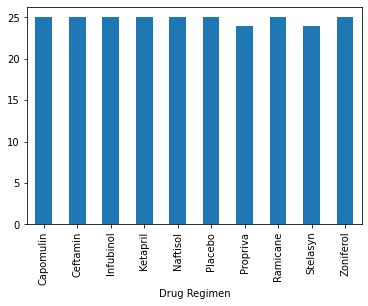

In [36]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


pandas_bar_plot.plot.bar()

In [ ]:
x = pandas_bar_plot["Drug Regimen"]
y = pandas_bar_plot

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Help needed

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
